In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy import stats
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('bus.csv') #importing csv file 
df.head() # Calling first 5 rows of dataset

,Day,Month,Hour,Minute,Bus 4 (kW),Bus 7 (kW),Bus 8 (kW),Bus 11 (kW),Bus 13 (kW),Bus 16 (kW),Bus 20 (kW),Bus 22 (kW),Bus 23 (kW),Bus 26 (kW),Bus 29 (kW),Bus 32 (kW),Total (kW),CS Class,PR Class,Price
0,1,1,0,0,11.5000,20.8330,18.5465,17.8695,21.5260,17.8515,18.9080,38.6195,16.9800,11.5000,161.195,63.980,1297.8320,BUS 4,HIGH,1.00
1,1,1,0,10,18.4825,35.9780,21.9925,19.1330,18.8120,19.1115,18.2860,47.2855,14.1755,18.4825,242.595,61.605,1370.5540,BUS 23,HIGH,1.00
2,1,1,0,20,15.1640,36.8860,17.3465,16.1675,17.7595,16.1540,16.0180,43.5105,16.7365,51.4150,156.095,56.970,1414.5255,BUS 4,HIGH,1.00
3,1,1,0,30,15.0490,37.9455,19.2230,20.6025,21.5535,20.5770,18.2495,42.4305,50.4100,51.3000,183.225,87.440,1329.8505,BUS 4,HIGH,1.00
4,1,1,0,40,18.3675,34.9440,21.3155,16.3995,17.5655,16.3855,16.0725,48.3635,53.0000,18.3675,287.930,51.430,1533.9005,BUS 20,HIGH,1.01


In [3]:
X=df[['Day','Month','Hour','Minute','Total (kW)','Bus 4 (kW)','Bus 7 (kW)','Bus 8 (kW)','Bus 11 (kW)','Bus 13 (kW)','Bus 16 (kW)','Bus 20 (kW)','Bus 22 (kW)','Bus 23 (kW)','Bus 26 (kW)','Bus 29 (kW)','Bus 32 (kW)']]
X=np.asarray(X)
X

array([[  1.    ,   1.    ,   0.    , ...,  11.5   , 161.195 ,  63.98  ],
       [  1.    ,   1.    ,   0.    , ...,  18.4825, 242.595 ,  61.605 ],
       [  1.    ,   1.    ,   0.    , ...,  51.415 , 156.095 ,  56.97  ],
       ...,
       [ 31.    ,  12.    ,  23.    , ...,  14.012 ,  45.    ,  38.4705],
       [ 31.    ,  12.    ,  23.    , ...,  11.5   , 153.225 ,  37.412 ],
       [ 31.    ,  12.    ,  23.    , ...,  47.9115,  80.075 ,  60.885 ]])

In [4]:
y=df['PR Class']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [11]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(x_train,y_train)
LR

C:\Users\Junaid Iqbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
yhat = LR.predict(x_test)
yhat

array(['HIGH', 'NORMAL', 'HIGH', ..., 'HIGH', 'HIGH', 'NORMAL'],
      dtype=object)

In [13]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
c=metrics.accuracy_score(y_test, yhat)


Test set Accuracy:  0.6326103500761036


In [14]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test,yhat)

<AxesSubplot:>

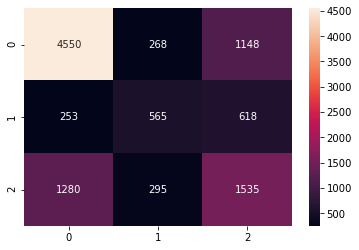

In [15]:
sns.heatmap(m, annot=True, fmt='d')

In [16]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 ... 1 1 1]


In [17]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))
b=metrics.accuracy_score(y, y_pred)

0.8903348554033486


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2)

In [20]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)


In [21]:

drugTree.fit(X_trainset,y_trainset)
predTree = drugTree.predict(X_testset)

In [22]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
a=metrics.accuracy_score(y_testset, predTree)

DecisionTrees's Accuracy:  0.8451293759512938


In [23]:
# SVM


In [24]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [25]:
yhat1 = clf.predict(x_test)


In [26]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))
d=metrics.accuracy_score(y_test, yhat1)

Test set Accuracy:  0.8434170471841704


In [ ]:
#Random Forest

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2)


In [8]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train) 
 
# performing predictions on the test dataset
y_pred = clf.predict(x_test)
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
e=metrics.accuracy_score(y_test, y_pred)


ACCURACY OF THE MODEL:  0.896404109589041


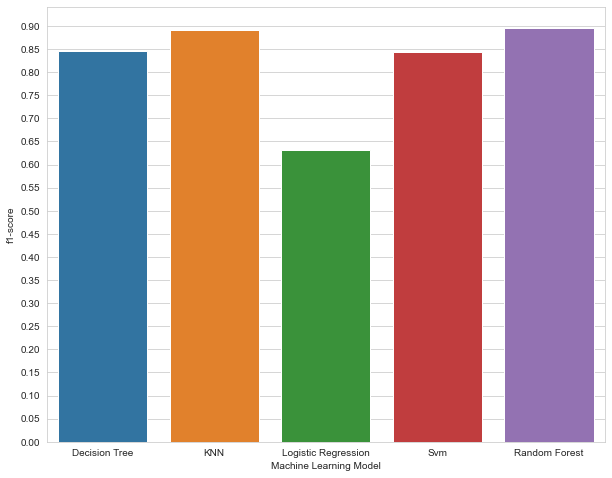

In [27]:
model = ['Decision Tree','KNN','Logistic Regression','Svm','Random Forest']
f1_score = [a,b,c,d,e]

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.yticks(np.linspace(0,1,21))
plt.ylabel("f1-score")
plt.xlabel("Machine Learning Model")
sns.barplot(x= model,  y= f1_score)
plt.show()